In [1]:
import tensorflow as tf
import  numpy as np
import matplotlib.pyplot as plt
import cv2

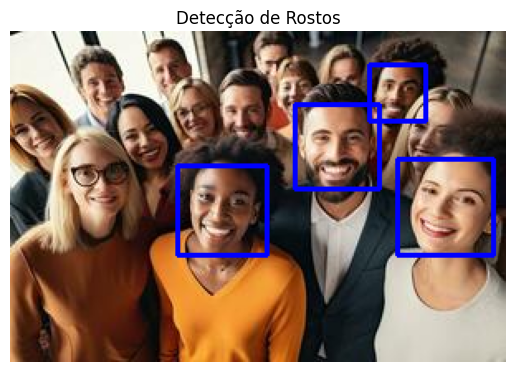

In [2]:
# Carregar a imagem
imagem = cv2.imread('image.jpg')

# Carregar o classificador de detecção de faces pré-treinado
classificador_faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converter a imagem para escala de cinza (necessário para detecção de objetos)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = classificador_faces.detectMultiScale(imagem_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor dos rostos detectados
for (x, y, w, h) in faces:
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Exibir a imagem com os rostos detectados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Detecção de Rostos')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


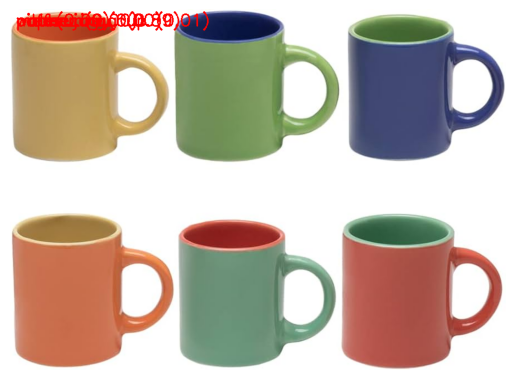

In [6]:
# Carregar o modelo MobileNet pré-treinado
model = tf.keras.applications.MobileNetV2(weights='imagenet')


# Função para carregar e pré-processar uma imagem
def load_and_preprocess_image(image_path):
    # Carregar a imagem
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    return img


# Função para fazer a predição de objetos em uma imagem
def predict_objects(image_path):
    # Carregar e pré-processar a imagem
    img = load_and_preprocess_image(image_path)
   
    # Adicionar uma dimensão extra para o batch
    img = np.expand_dims(img, axis=0)
   
    # Fazer a predição
    preds = model.predict(img)
   
    # Decodificar as previsões
    decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)[0]
   
    return decoded_preds


# Função para exibir a imagem com os objetos detectados
def display_image_with_objects(image_path, objects):
    # Carregar a imagem
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
    # Desenhar caixas ao redor dos objetos detectados
    for _, label, confidence in objects:
        cv2.putText(img, f'{label} ({confidence:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
   
    # Exibir a imagem
    plt.imshow(img)
    plt.axis('off')
    plt.show()


# Caminho para a imagem que você deseja analisar
image_path = "imagem2.jpg"


# Fazer a predição de objetos na imagem
objects = predict_objects(image_path)


# Exibir a imagem com os objetos detectados
display_image_with_objects(image_path, objects)

